## Observations and Insights 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df=pd.merge(mouse_metadata,study_results,on="Mouse ID")
df

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [75]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [76]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [77]:
# Checking the number of mouse
number_of_mice = df["Mouse ID"].nunique()
number_of_mice

249

In [78]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
# Approach 3: Use drop_duplicates method
duplicate = study_results[study_results[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,0,45.000000,0
360,g989,5,47.570392,0
681,g989,10,49.880528,0
869,g989,15,53.442020,0
1111,g989,20,54.657650,1


In [79]:
# getting all the data by mering the original data , for duplicate mouse
merge = pd.merge(df,duplicate)
merge


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,47.570392,0
3,g989,Propriva,Female,21,26,10,49.880528,0
4,g989,Propriva,Female,21,26,15,53.442020,0
5,g989,Propriva,Female,21,26,20,54.657650,1


In [80]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep='last')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [81]:
# Checking the number of mice in the clean DataFrame.

clean_df["Mouse ID"].nunique()

249

## Summary Statistics

In [82]:
# Generated a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimenby using groupby  
# Assembled the resulting series into a single summary dataframe as sum_DataFrame

grouping=clean_df.groupby("Drug Regimen")
mean=grouping["Tumor Volume (mm3)"].mean()
median=grouping["Tumor Volume (mm3)"].median()
std=grouping["Tumor Volume (mm3)"].std()
var=grouping["Tumor Volume (mm3)"].var()
sem=grouping["Tumor Volume (mm3)"].sem()


sum_DataFrame = pd.DataFrame({"Mean": mean,
                              "Median": median,
                              "Standar Dev": std,
                              "Variance": var,
                              "Sem":sem})
sum_DataFrame




,Mean,Median,Standar Dev,Variance,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.382993,50.783528,6.574208,43.220205,0.526358
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [83]:
# Generated a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#by using the aggregation method, produced the same summary statistics.

agg_function = ({"Tumor Volume (mm3)":["mean","median","std", "var","sem"]})
clean_df.groupby("Drug Regimen").agg(agg_function)



Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.382993  50.783528  6.574208  43.220205  0.526358
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Timepoints')

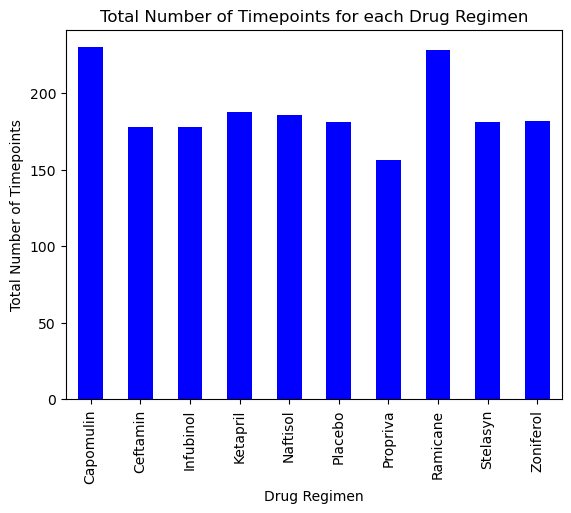

In [84]:
# created bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints =clean_df.groupby("Drug Regimen")["Timepoint"].count()
pandas_bar=timepoints.plot.bar(color='b')
plt.title("Total Number of Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

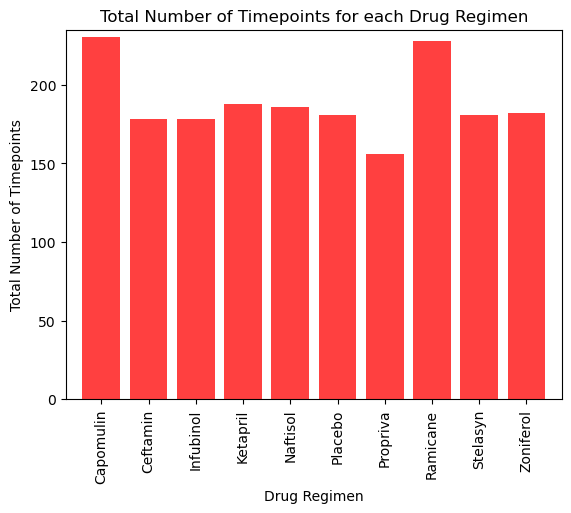

In [85]:
# created a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplo
x_axis=timepoints.index.values
y_axis=timepoints.values 

plt.title("Total Number of Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(y_axis) + 5)

plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
plt.xticks(rotation="vertical")
plt.show()                  

Text(0.5, 1.0, 'Distribution of female vs Male')

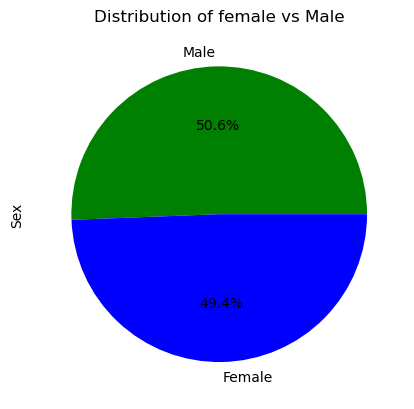

In [86]:
# created a pie plot showing the distribution of female versus male mice using Pandas

sex=df["Sex"].value_counts()
sex.plot.pie(autopct="%1.1f%%",colors=['g','b'])
plt.title("Distribution of female vs Male")



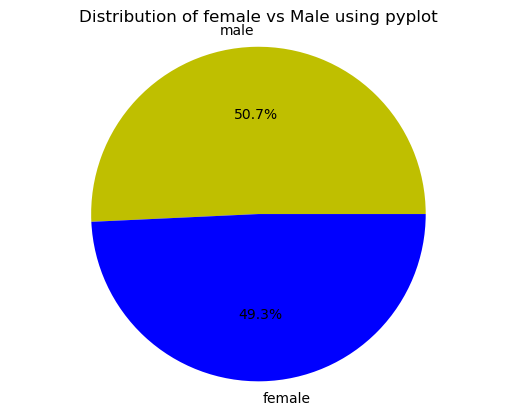

In [87]:
#created a pie plot showing the distribution of female versus male mice using pyplot
sex=clean_df["Sex"].value_counts()
lables=["male","female"]
plt.pie(sex,  labels=lables, colors=['y','b'],
         autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of female vs Male using pyplot")
plt.show()


In [88]:
#Quartiles, Outliers and Boxplots

In [89]:
#  got the the last (greatest) timepoint for each mouse by using max function

greatest_timepoint_df = clean_df.groupby(["Mouse ID"]).agg({"Timepoint":max})
greatest_timepoint_df.reset_index(inplace=True)
greatest_timepoint_df
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_timepoint_df = greatest_timepoint_df.merge(clean_df, how='left', on=["Mouse ID", "Timepoint"])
final_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_ofinterest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Calculated the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

df2=final_timepoint_df[final_timepoint_df["Drug Regimen"].isin(drugs_ofinterest)]

# Created empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes by looping
    
tumor_volume_list= []
for drug in drugs_ofinterest:
    tumor_volume = df2.loc[df2["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    tumor_volume_list.append(tumor_volume)
#Calculated the IQR and quantitatively determine if there are any potential outliers.   
# Determined outliers using upper and lower bounds

    quantiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
  
     #gfinding outlier by usinig lower and upper_bounds
    out_lier=tumor_volume.loc[(tumor_volume <lower_bound) | (tumor_volume>upper_bound)]
     
    print(f"{drug}'s potential outliers: {out_lier}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


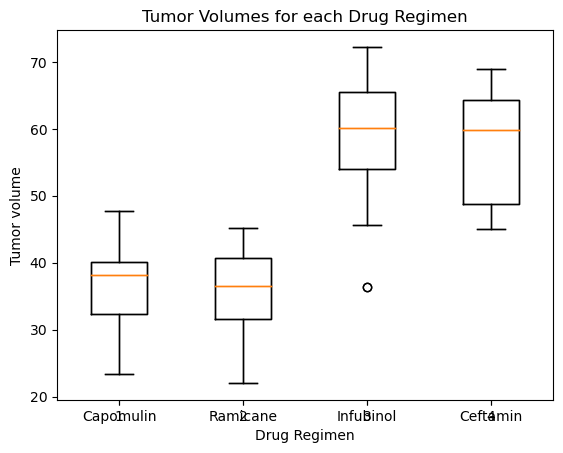

In [91]:
# box plot of the final tumor volume of each mouse across four regimens of interest
x= tumor_volume_list
plt.boxplot(tumor_volume_list, labels = drugs_ofinterest)
plt.title('Tumor Volumes for each Drug Regimen')
plt.ylabel('Tumor volume')
plt.xlabel("Drug Regimen")
plt.boxplot(x)
plt.show()



In [92]:
## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

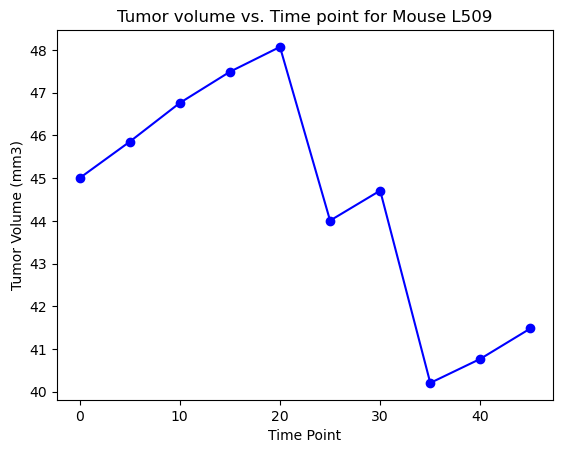

In [93]:
#  a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = clean_df.loc[(clean_df["Drug Regimen"]=="Capomulin") & (clean_df["Mouse ID"]=="l509"), ["Timepoint","Tumor Volume (mm3)"]]

plt.plot(x_axis["Timepoint"], x_axis["Tumor Volume (mm3)"],marker ='o', color='blue', label="pharma")

plt.title("Tumor volume vs. Time point for Mouse L509")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Average Tumor volume (mm3)')

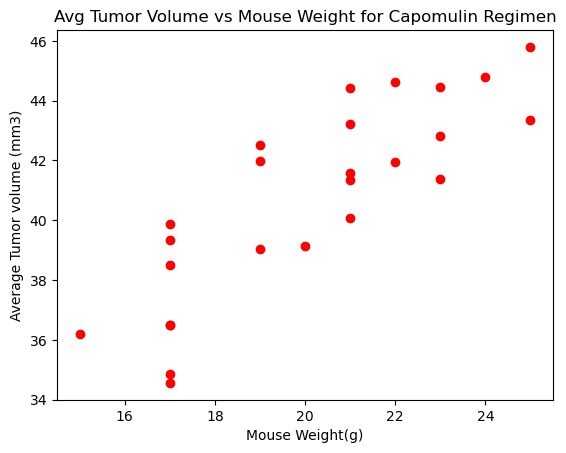

In [94]:
#  a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",["Mouse ID","Tumor Volume (mm3)","Weight (g)"]]
output = capomulin.groupby(["Mouse ID"]).agg({"Tumor Volume (mm3)":"mean",
                                               "Weight (g)":"mean"})

plt.scatter(output["Weight (g)"], output["Tumor Volume (mm3)"], marker="o", color="red")
plt.title("Avg Tumor Volume vs Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight(g)")
plt.ylabel("Average Tumor volume (mm3)")


## Correlation and Regression

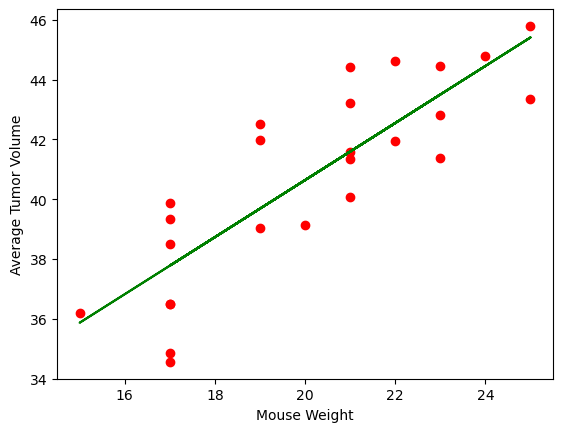

The correlation coefficient between mouse weight and tumor volume is 0.84


In [95]:
# The correlation coefficient and linear regression 
# for mouse weight and average tumor volume for the Capomulin regime

x_axis=output["Weight (g)"]
y_axis=output["Tumor Volume (mm3)"]


m_slope, m_int, m_r, m_p, m_std_err = st.linregress(x_axis, y_axis)
m_fit = m_slope * x_axis + m_int
req_eq = 'y = ' + str(round(m_slope,2)) + 'x + ' + str(round(m_int,2))

correlation = st.pearsonr(x_axis,y_axis)

plt.scatter(x_axis,y_axis, marker="o", color="red")
plt.plot(x_axis,m_fit,"g-")

plt.ylabel('Average Tumor Volume')
plt.xlabel('Mouse Weight')
#plt.annotate(req_eq,xy=(20,20),fontsize=14,color="red")
plt.show()
#print correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(correlation[0],2)}")
